In [ ]:
"""
Purpose: To split a limb for the neuron object

Application: To be used when performing splits

"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")

In [6]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du
du = reload(du)

INFO - 2020-11-27 03:49:14,410 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-27 03:49:14,412 - settings - Setting database.user to celiib
INFO - 2020-11-27 03:49:14,413 - settings - Setting database.password to newceliipass


In [9]:
import neuron_visualizations as nviz
curr_seg_id = 864691134884742394
minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-27 03:49:39,379 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-27 03:49:39,380 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-27 03:49:39,393 - connection - Connected celiib@at-database.ad.bcm.edu:3306
INFO - 2020-11-27 03:49:39,577 - settings - Setting enable_python_native_blobs to True


Connecting celiib@at-database.ad.bcm.edu:3306


In [243]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=curr_seg_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [11]:
ret_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


# Exploring the parts of neuron that depend on the limb

In [13]:
neuron_obj.preprocessed_data.keys()

dict_keys(['soma_meshes', 'soma_to_piece_connectivity', 'soma_sdfs', 'soma_volume_ratios', 'insignificant_limbs', 'not_processed_soma_containing_meshes', 'non_soma_touching_meshes', 'inside_pieces', 'limb_meshes', 'limb_correspondence', 'limb_concept_networks', 'limb_labels', 'limb_network_stating_info'])

In [ ]:
"""  
Things that would need to change for the limb objects:

How normally would create a limb object:
Arguments:
1) Mesh,
2) limb correspondence
3) concept networks
4) Face idx (in reference to the larger mesh)
5) labels

Then set the node data in the network


Approach then:
For the two new limbs:
1) Calculate the new mesh and new face_idx (will need for the branch face idx)
2) CAlculate the new limb correspondence (just have to )
3) Calculate the new concept network
4) Add a label

Send to limb object creation

Set this objet as the data for a node in the concept network

Adjust the edges of that node based on the all_soma_touching dict

"""

# Example on Splitting Neuron

In [27]:
ret_col = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(L0="all"),
                               return_color_dict=True)



 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


No limb name was given so using L0 because was the limb in the first key


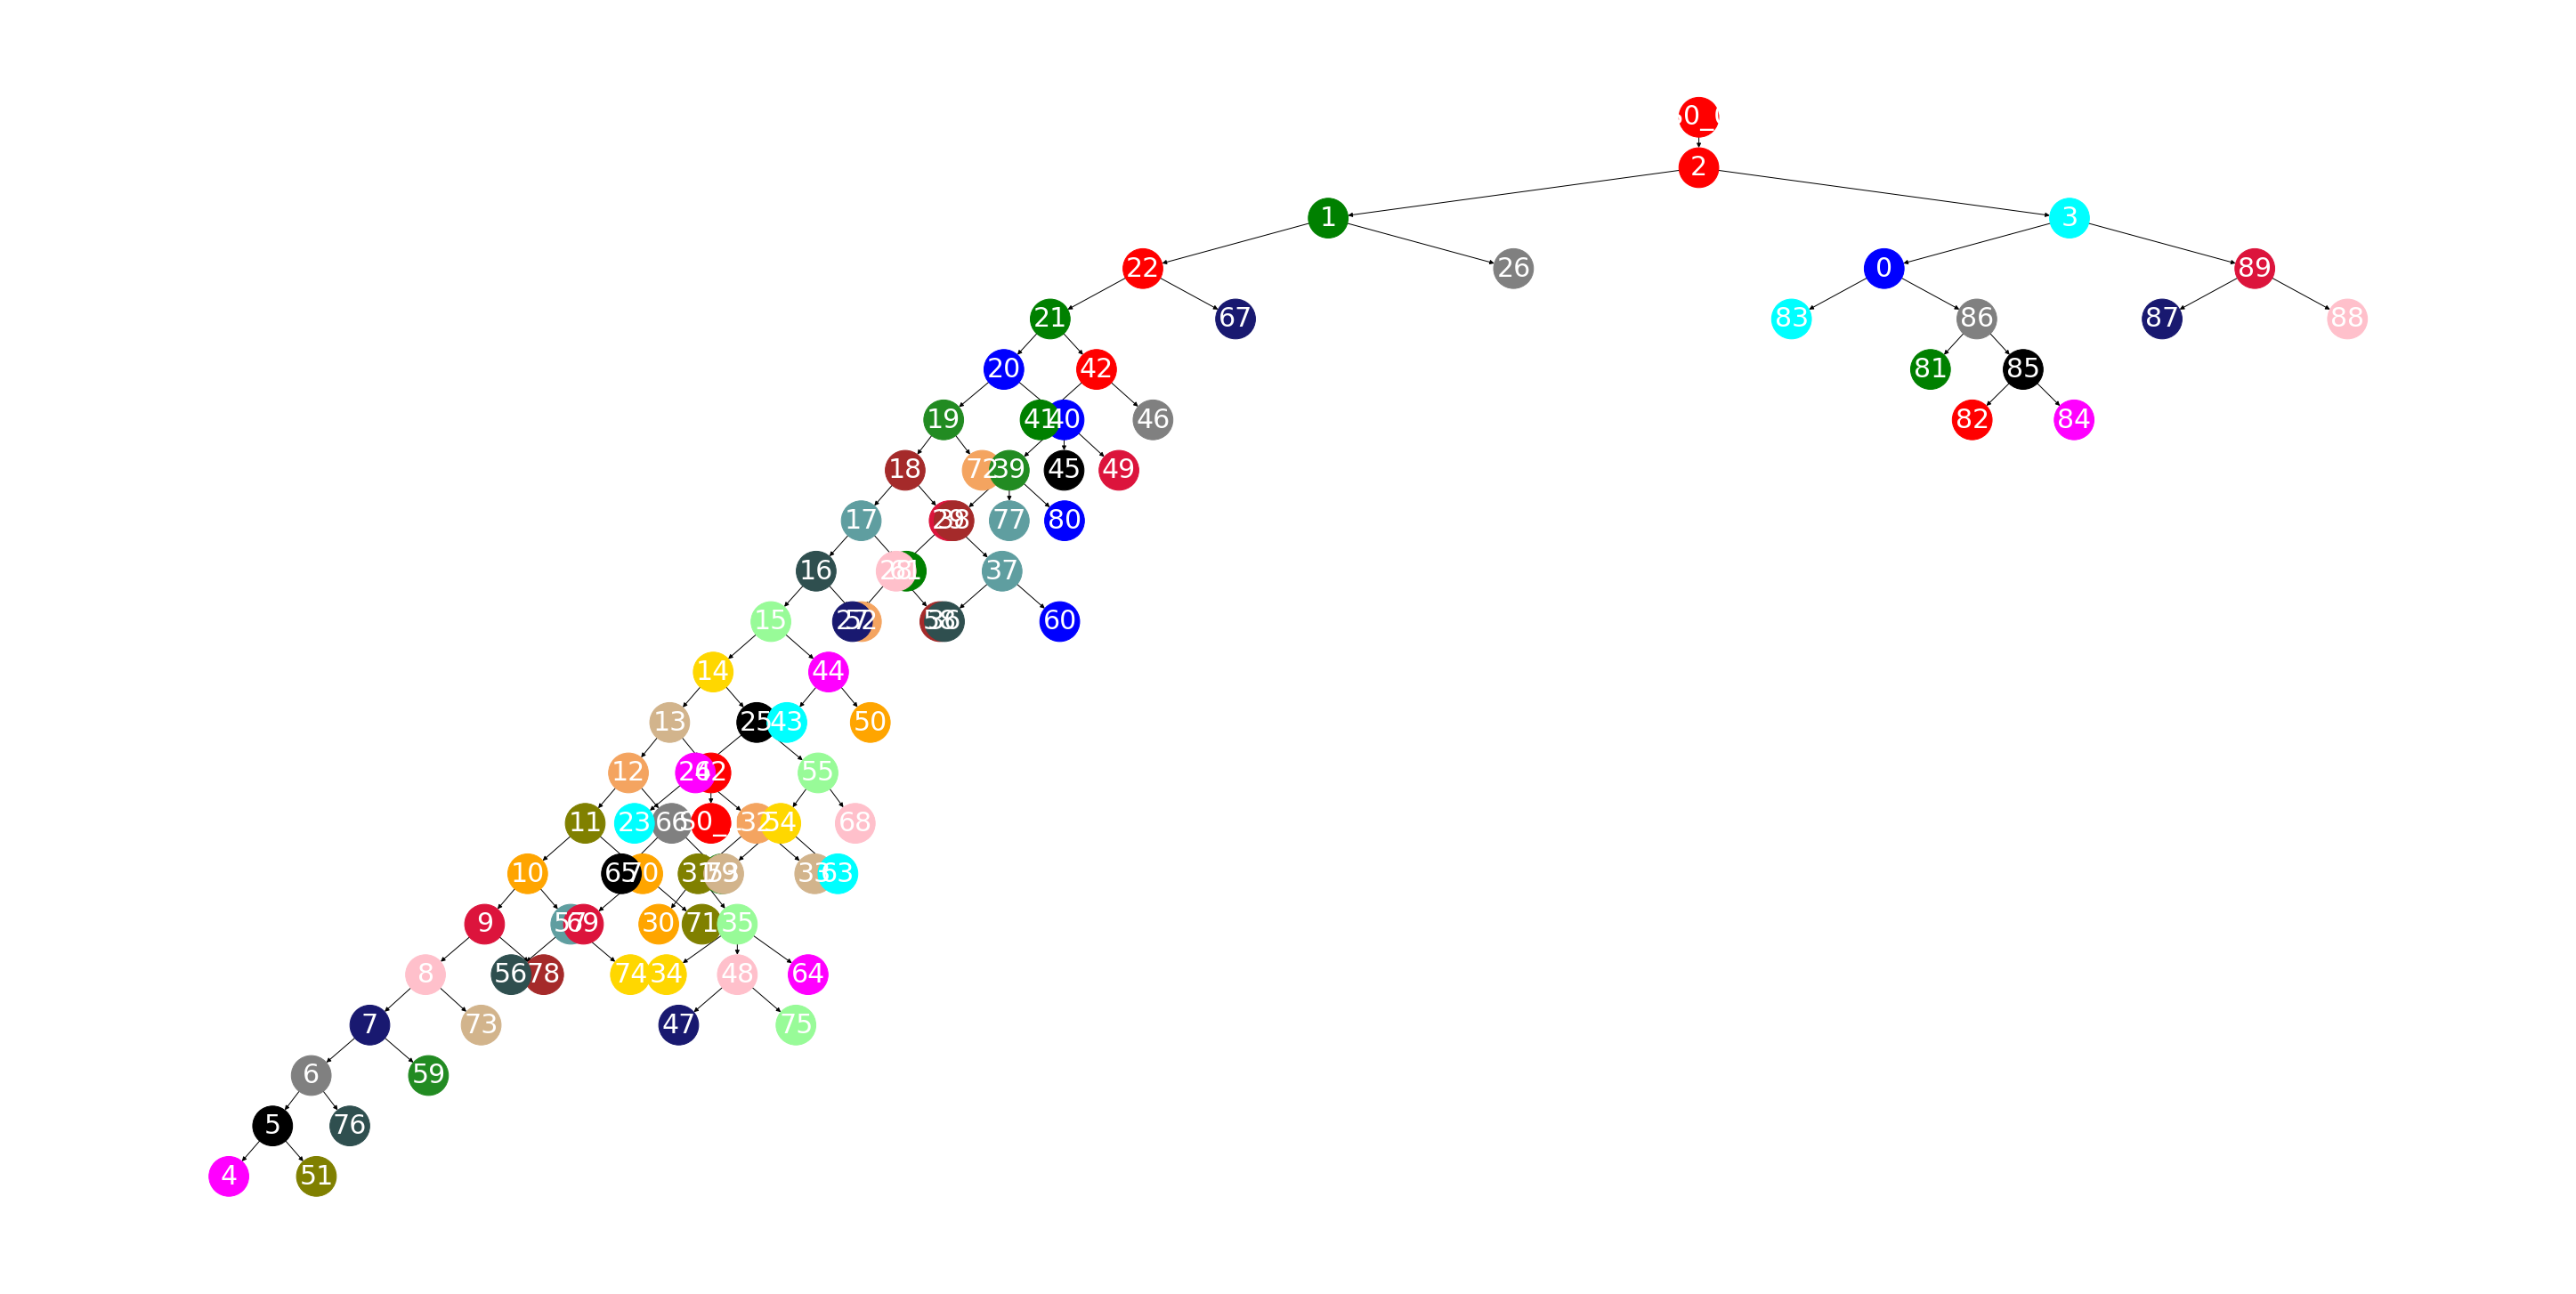

In [28]:
nviz.plot_limb_concept_network_2D(neuron_obj,node_colors=ret_col)

In [49]:
"""
Find path to cut:
1) Get the concept network
2) Get all of the starting nodes for somas
3) Get the shortest path between each combination of starting nodes

"""
def get_best_cut_edge(curr_limb_graph,cut_path):
    return [18,17]


import itertools
import networkx as nx
import copy

verbose = True

curr_limb = neuron_obj[0]
curr_limb_graph = copy.deepcopy(curr_limb.concept_network)

#2) Get all of the starting nodes for somas
all_starting_nodes = [k["starting_node"] for k in curr_limb.all_concept_network_data]

starting_node_combinations = list(itertools.combinations(all_starting_nodes,2))

for st_n_1,st_n_2 in starting_node_combinations:
    # need to keep cutting until no path for them
    if verbose:
        print(f"---- working on disconnecting {st_n_1} and {st_n_2}")
        
    counter = 0
    while True:
        if verbose:
            print(f" Cut iteration {counter}")
        try:
            soma_to_soma_path = nx.shortest_path(curr_limb_graph,st_n_1,st_n_2)
        except:
            print("No valid path so just skipping ")
            break

        if verbose:
            print(f"Shortest path = {soma_to_soma_path}")

        # say we found the cut node to make
        cut_edge = get_best_cut_edge(curr_limb_graph,soma_to_soma_path)
        curr_limb_graph.remove_edge(*cut_edge)
        
        counter += 1


seperated_graphs = list(nx.connected_components(curr_limb_graph))
print(f"Total number of graphs at the end of the "len(seperated_graphs))



---- working on disconnecting 2 and 62
 Cut iteration 0
Shortest path = [2, 1, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 62]
in remove edge
 Cut iteration 1
No valid path so just skipping 
2


In [ ]:
"""
parts of preprocessing that depend on limbs:

soma_to_piece_connectivity
limb_meshes
limb_correspondence:
limb_idx --> branch_idx --> dict_keys(['branch_skeleton', 'width_from_skeleton', 'branch_mesh', 'branch_face_idx'
- branch_face_idx is in reference to the face


limb_concept_networks

{0: {0: [<networkx_utils.GraphOrderedEdges at 0x7f510c4b92b0>,
   <networkx_utils.GraphOrderedEdges at 0x7f50d6e17c88>]},
 1: {0: [<networkx_utils.GraphOrderedEdges at 0x7f50d6e17cc0>]},
 2: {0: [<networkx_utils.GraphOrderedEdges at 0x7f50d6e17be0>]},
 3: {0: [<networkx_utils.GraphOrderedEdges at 0x7f50e0a8b780>]},
 4: {0: [<networkx_utils.GraphOrderedEdges at 0x7f51bb837320>]}}
 
 
limb_labels

{0: 'Unlabeled',
 1: 'Unlabeled',
 2: 'Unlabeled',
 3: 'Unlabeled',
 4: 'Unlabeled'}
 
 
limb_network_stating_info: 
dictionary mapping limb_idx --> soma_idx --> soma_group_idx --> dict(touching_verts,endpoint)


------------------------------------------
other parts of neuron object that would be affected...

self.concept_network

--> should look at the soma_starting dictionaries for each limb and then that gives you the new soma connectivitys

#Can have function that just recomputes these parts (ONLY FOR LIMBS AFFECTED)
"""



In [ ]:
"""  
Things that would need to change for the limb objects:

How normally would create a limb object:
Arguments:
1) Mesh,
2) limb correspondence
3) concept networks
4) Face idx (in reference to the larger mesh)
5) labels

Then set the node data in the network


Approach then:
For the two new limbs:
1) Calculate the new mesh and new face_idx (will need for the branch face idx)
2) CAlculate the new limb correspondence (just have to )
3) Calculate the new concept network
4) Add a label

Send to limb object creation

Set this objet as the data for a node in the concept network

Adjust the edges of that node based on the all_soma_touching dict

"""

In [44]:
"""
How to split seperated graphs into multiple limbs

Arguments:
- the seperated limb connectivity graph
- Current limb object

Outputs: Seperate Limb objects

Pseudo
"""

in remove edge


In [210]:
# -------- Getting the mesh and correspondence information --------- #
"""
1) Assemble all the faces of the nodes and concatenate them
- copy the data into the new limb correspondence
- save the order they were concatenated in the new limb correspondence
- copy of 
2) Use the concatenated faces idx to obtain the new limb mesh
3) index the concatenated faces idx into the limb.mesh_face_idx to get the neew limb.mesh_face_idx
"""
import numpy as np
import preprocessing_vp2 as pre
curr_limb_idx = 0
curr_limb = copy.deepcopy(neuron_obj[curr_limb_idx])

new_limb_data = []

for seg_graph_idx,sep_G in enumerate(seperated_graphs):
    if verbose:
        print(f"\n\n----Working on seperate_graph {seg_graph_idx}----")

    curr_subgraph = list(sep_G)

    #will store all of the relevant info in the 
    sep_graph_data = dict()


    fixed_node_objects = dict()

    limb_face_idx_concat = []
    face_counter = 0
    old_node_to_new_node_mapping = dict()
    for i,n_name in enumerate(curr_subgraph):
        #store the mapping for the new names
        old_node_to_new_node_mapping[n_name] = i

        fixed_node_objects[i] = copy.deepcopy(curr_limb[n_name])
        curr_mesh_face_idx = fixed_node_objects[i].mesh_face_idx
        limb_face_idx_concat.append(curr_mesh_face_idx)
        fixed_node_objects[i].mesh_face_idx = np.arange(face_counter,face_counter+len(curr_mesh_face_idx))
        face_counter += len(curr_mesh_face_idx)


    total_limb_face_idx = np.concatenate(limb_face_idx_concat)
    new_limb_mesh = curr_limb.mesh.submesh([total_limb_face_idx],append=True,repair=False)


    new_limb_mesh_face_idx = tu.original_mesh_faces_map(neuron_obj.mesh, new_limb_mesh,
                               matching=True,
                               print_flag=False)

    #recovered_new_limb_mesh = neuron_obj.mesh.submesh([new_limb_mesh_face_idx],append=True,repair=False)
    sep_graph_data["limb_meshes"] = new_limb_mesh
    
    # ------- How to get the new concept network starting info --------- #

    #get all of the starting dictionaries that match a node in the subgraph
    curr_all_concept_network_data = [k for k in curr_limb.all_concept_network_data if k["starting_node"] in list(curr_subgraph)]
    if len(curr_all_concept_network_data) != 1:
        raise Exception(f"There were more not exactly one starting dictinoary: {curr_all_concept_network_data} ")

    curr_all_concept_network_data[0]["soma_group_idx"] = 0

    curr_limb_network_stating_info = nru.all_concept_network_data_to_dict(curr_all_concept_network_data)

    #calculate the concept networks


    limb_corresp_for_networks = dict([(i,dict(branch_skeleton=k.skeleton,
                                             width_from_skeleton=k.width,
                                             branch_mesh=k.mesh,
                                             branch_face_idx=k.mesh_face_idx)) for i,k in fixed_node_objects.items()])

    sep_graph_data["limb_correspondence"] = limb_corresp_for_networks

    sep_graph_data["limb_network_stating_info"] = curr_limb_network_stating_info

    limb_to_soma_concept_networks = pre.calculate_limb_concept_networks(limb_corresp_for_networks,
                                                                                    curr_limb_network_stating_info,
                                                                                    run_concept_network_checks=True,
                                                                                   )   

    sep_graph_data["limb_concept_networks"] = limb_to_soma_concept_networks
    
    
    # --------------- Making the new limb object -------------- #
    new_labels = ["split_limb"]
    new_limb_obj = neuron.Limb(mesh=new_limb_mesh,
                 curr_limb_correspondence=limb_corresp_for_networks,
                 concept_network_dict=limb_to_soma_concept_networks,
                 mesh_face_idx=new_limb_mesh_face_idx,
                labels=new_labels,
                 branch_objects = fixed_node_objects,#this will have a dictionary mapping to the branch objects if provided
               )


    sep_graph_data["limb_labels"] = new_labels
    sep_graph_data["Limb_obj"] = new_limb_obj
    
    new_limb_data.append(sep_graph_data)



----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [877209. 741231. 615803.]---------
Starting_edge inside branches_to_conept = [[875212. 742061. 616893.]
 [877209. 741231. 615803.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [19]
printing out current edge:
[[877209. 741231. 615803.]
 [875212. 742061. 616893.]]
edge_endpoints_to_process was empty so exiting loop after 38 iterations
starting_node in concept map (that should match the starting edge) = 2
Total time for branches to concept conversion = 1.2036874294281006

Done generating concept network 


recovered_touching_piece = [2]
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f50afc3f080>]}
checking and resolving cycles
No cycles to fix


----Working on seperate_graph 1----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [883192.09948913 743523.79014019 611188.81171996]---------
Starting_ed

In [212]:
new_limb_data[0].keys()

dict_keys(['limb_meshes', 'limb_correspondence', 'limb_network_stating_info', 'limb_concept_networks', 'limb_labels', 'Limb_obj'])

# Now revising the neuron object to have the new limbs

In [ ]:
"""
Pseudocode: 
1) map the new neuron objects to unused limb names
2) For each one find the somas they are touching

4) Delete the old limb from the neuron concept network
5) Add the new limb nodes with edges to the somas they are touching
6) Delete the old limb data in the preprocessing dictionary (Adjust the soma_to_piece_connectivity)
7) Add in the new limb data into the preprocessing dictionary


"""

In [ ]:
import networkx_utils as xu
xu = reload(xu)

In [244]:

#neuron_obj_cp.concept_network = xu.GraphOrderedEdges(neuron_obj_cp.concept_network)

In [275]:
neuron_obj_cp = copy.deepcopy(neuron_obj)
#1) map the new neuron objects to unused limb names
new_limb_dict = dict()
new_limb_idxs = [curr_limb_idx] + [len(neuron_obj_cp) + i for i in range(len(new_limb_data[1:]))]
new_limb_string_names = [f"L{k}" for k in new_limb_idxs]
for l_i,limb_data in zip(new_limb_idxs,new_limb_data):
    new_limb_dict[l_i] = limb_data


#2) For each one find the somas they are touching
for l_i,limb_data in new_limb_dict.items():
    
    new_limb_dict[l_i]["touching_somas"] = curr_limb_touching_somas
    


#3) Delete the old limb data in the preprocessing dictionary (Adjust the soma_to_piece_connectivity)
attr_to_update = ['limb_meshes', 'limb_correspondence', 'limb_network_stating_info', 'limb_concept_networks', 'limb_labels']
for attr_upd in attr_to_update:
    del neuron_obj_cp.preprocessed_data[attr_upd][curr_limb_idx]
    
# --- revise the soma_to_piece_connectivity -- #
somas_to_delete_from = np.unique(neuron_obj_cp[curr_limb_idx].touching_somas())

for sm_d in somas_to_delete_from:
    neuron_obj_cp.preprocessed_data["soma_to_piece_connectivity"][sm_d].remove(curr_limb_idx)

#4) Delete the old limb from the neuron concept network   
neuron_obj_cp.concept_network.remove_node(f"L{curr_limb_idx}")

#5) Add the new limb nodes with edges to the somas they are touching
for l_i,limb_data in new_limb_dict.items():
    curr_limb_obj = limb_data["Limb_obj"]
    curr_limb_touching_somas = curr_limb_obj.touching_somas()
    
    
    
    str_node_name = f"L{l_i}"
    neuron_obj_cp.concept_network.add_node(str_node_name)
    
    xu.set_node_data(curr_network=neuron_obj_cp.concept_network,
                                     node_name=str_node_name,
                                     curr_data=curr_limb_obj,
                                     curr_data_label="data")
    
    for sm_d in curr_limb_touching_somas:
        neuron_obj_cp.preprocessed_data["soma_to_piece_connectivity"][sm_d].append(l_i)
        neuron_obj_cp.concept_network.add_edge(str_node_name,f"S{sm_d}")
    
    for attr_upd in attr_to_update:
        if attr_upd == "limb_meshes":
            neuron_obj_cp.preprocessed_data[attr_upd].insert(l_i,limb_data[attr_upd])
        else:
            neuron_obj_cp.preprocessed_data[attr_upd][l_i] = limb_data[attr_upd]



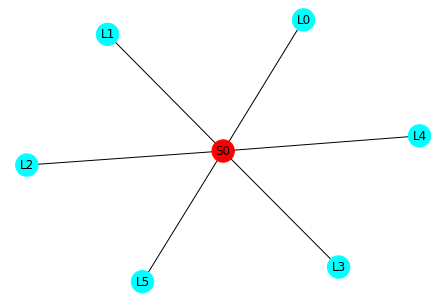

In [276]:
nviz.plot_soma_limb_concept_network(neuron_obj_cp)

In [278]:
nviz.visualize_neuron(neuron_obj_cp,
                     visualize_type=["mesh","skeleton"],
                      limb_branch_dict="all",
                     mesh_resolution="limb",
                     skeleton_resolution="limb")


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


In [279]:
nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                      limb_branch_dict="all",
                     mesh_resolution="limb",
                     skeleton_resolution="limb")


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


In [266]:
x = [1,34,7,6,77]
del x[1]
x

[1, 7, 6, 77]

In [273]:
x.insert(7,66)

In [274]:
x

[1, 88, 7, 6, 77, 88, 88, 66]